### Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

### ( Simple Linear Regression)
We use a simple linear Regression Algorithm to predict Sales based on the Advertisement Expenditure.


##### Importing Libraries

In [1]:
# Supress Warning
import warnings
warnings.filterwarnings('ignore')

# Data Processing
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##### Importing Dataset

In [2]:
advertising=pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


##### Calculating the percentage of Null values.

In [6]:
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

##### Creating a boxplot of each column to check outliers.

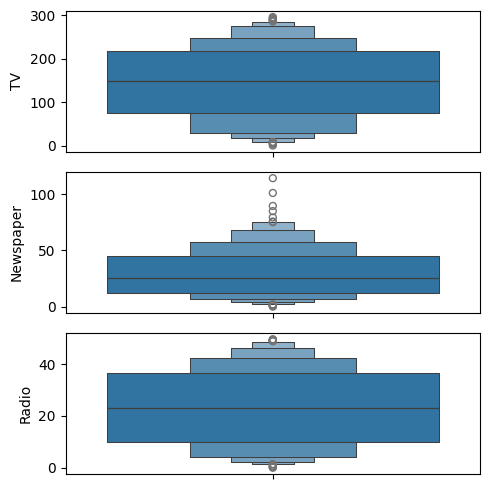

In [7]:
fig, axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxenplot(advertising['TV'],ax=axs[0])
plt2=sns.boxenplot(advertising['Newspaper'],ax=axs[1])
plt3=sns.boxenplot(advertising['Radio'],ax=axs[2])
plt.tight_layout()

##### According to the boxplot, some outliers are available in the Newspapers Column. 

##### Removing outliers form Newspaper column.

In [8]:
print("Old Shape: ", advertising.shape)
 
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = advertising['Newspaper'].quantile(0.25)
Q3 = advertising['Newspaper'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(advertising['Newspaper']>=upper)[0]
lower_array = np.where(advertising['Newspaper']<=lower)[0]
 
# Removing the outliers
advertising.drop(index=upper_array, inplace=True)
advertising.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", advertising.shape)

Old Shape:  (200, 4)
New Shape:  (198, 4)


##### New shape generated after removing outliers.

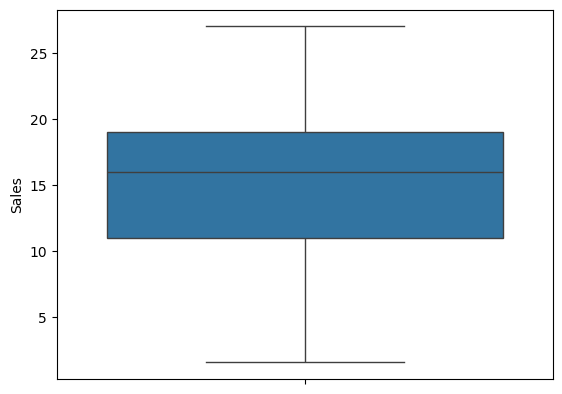

In [9]:
sns.boxplot(advertising['Sales'])
plt.show()

In [10]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,15.100000
std,85.443221,14.862111,20.446303,5.271184
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,11.000000
50%,149.750000,22.400000,25.600000,16.000000
75%,218.475000,36.325000,44.050000,18.975000
max,293.600000,49.600000,89.400000,27.000000


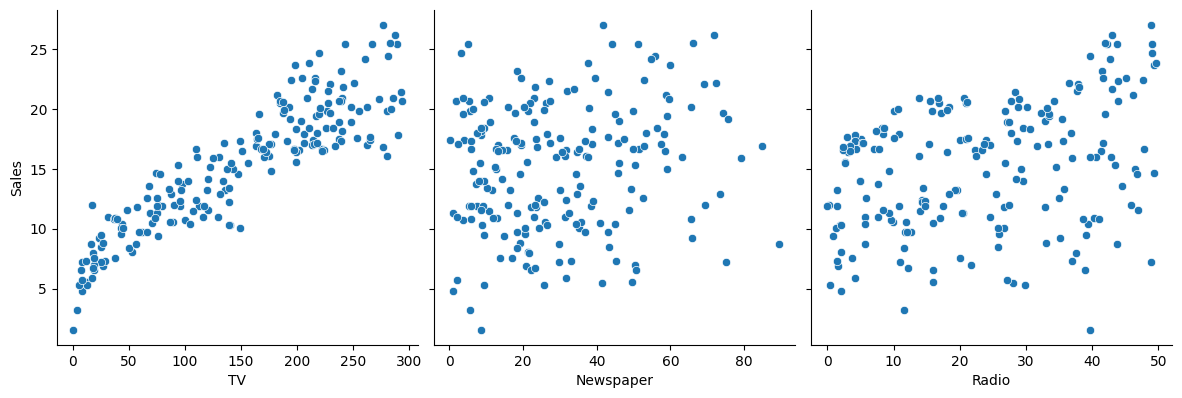

In [11]:
sns.pairplot(advertising,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

##### According to Pairplot, when advertising costs increase in TV commercials, sales will also increase. At the same time, this is a bit unexpected for newspapers and radio.

<Axes: ylabel='Frequency'>

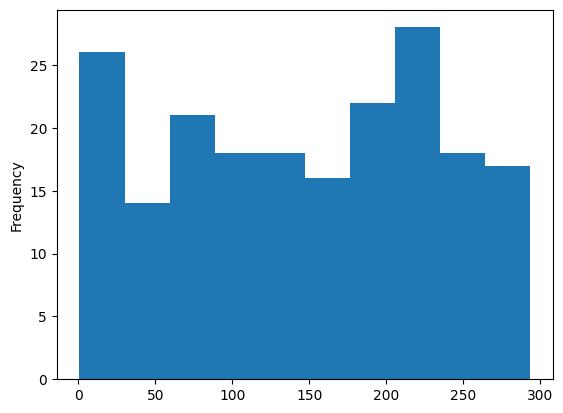

In [12]:
advertising['TV'].plot.hist(bins=10)

<Axes: xlabel='Radio', ylabel='Frequency'>

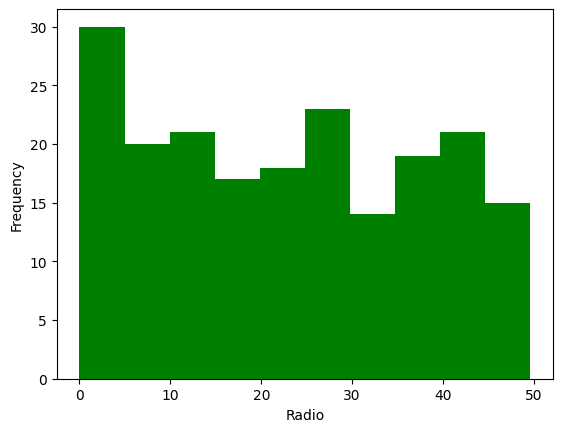

In [13]:
advertising['Radio'].plot.hist(bins=10, color="Green",xlabel="Radio")

<Axes: xlabel='Newspaper', ylabel='Frequency'>

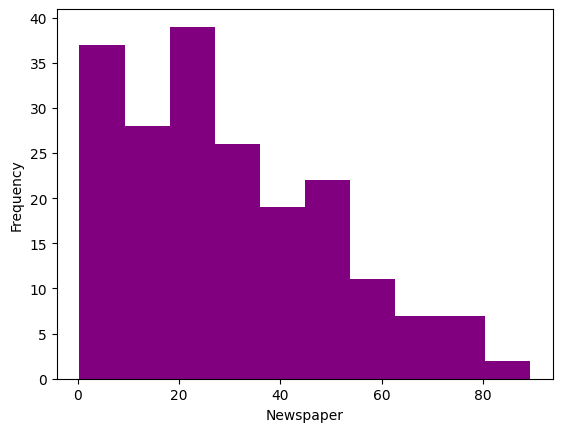

In [14]:
advertising['Newspaper'].plot.hist(bins=10, color="Purple",xlabel="Newspaper")

<Axes: >

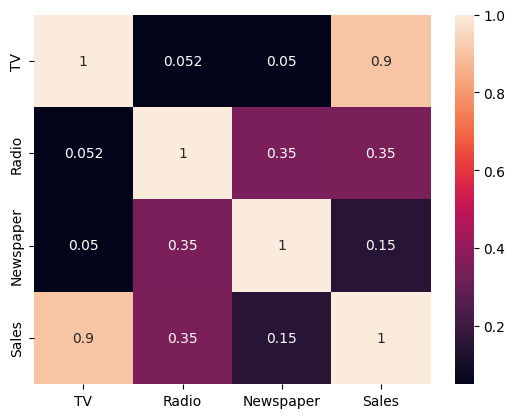

In [15]:
sns.heatmap(advertising.corr(),annot=True)

##### Sales is highly coorelated with the TV
  ###### Lets train our model using "Linear Regression" as it is coorelated with only one variable "TV".

##### Data splitting for training and testing. 

In [16]:
X_train,X_test,y_train,y_test=train_test_split(advertising[['TV']],advertising[['Sales']],train_size=0.7,test_size=0.3,random_state=0)

##### Create a linear regression model to predict sales percent through TV advertising expenditure. 

In [17]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

##### Ready to predict sales percent after training the model.

In [18]:
res=model.predict(X_test)
print(res)

[[14.99686799]
 [ 9.84773136]
 [14.13956055]
 [16.20874084]
 [ 8.61998244]
 [13.05998823]
 [ 7.6621266 ]
 [14.67934672]
 [ 8.4612218 ]
 [17.65875465]
 [21.02977216]
 [ 8.65702659]
 [19.61151048]
 [16.98666796]
 [11.17602868]
 [13.56273024]
 [12.26618505]
 [ 8.55647818]
 [ 9.48258189]
 [18.60073443]
 [19.992536  ]
 [14.6264265 ]
 [11.94866378]
 [14.17131268]
 [11.08606432]
 [18.2937972 ]
 [15.96530787]
 [18.05036422]
 [20.47940195]
 [16.46804988]
 [22.09346842]
 [21.68598279]
 [ 9.47728987]
 [22.53270618]
 [19.28340516]
 [12.18680473]
 [18.86004347]
 [16.76969509]
 [14.57350629]
 [11.81636324]
 [18.83358336]
 [21.85532747]
 [19.90786366]
 [19.86552749]
 [20.07191632]
 [18.50018602]
 [ 7.65683458]
 [12.73717493]
 [ 8.09607234]
 [ 8.19132872]
 [14.35653342]
 [ 7.5880383 ]
 [19.90786366]
 [13.40396961]
 [21.1144445 ]
 [13.17641269]
 [11.34008134]
 [16.56859829]
 [14.40945363]
 [18.76478708]]


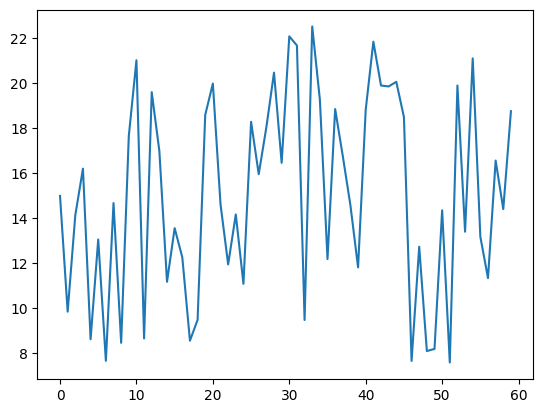

In [19]:
plt.plot(res)